In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("data/chloramines.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ph            3276 non-null   float64
 1   Hardness      3276 non-null   float64
 2   Solids        3276 non-null   float64
 3   Conductivity  3276 non-null   float64
 4   Turbidity     3276 non-null   float64
 5   Chloramines   3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


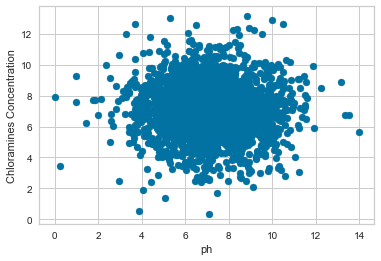

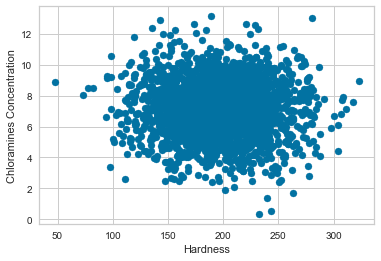

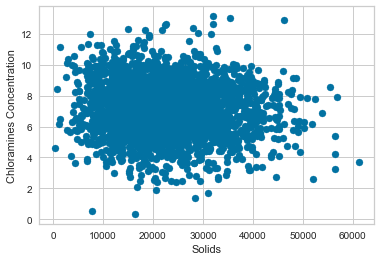

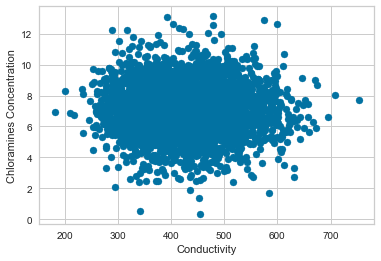

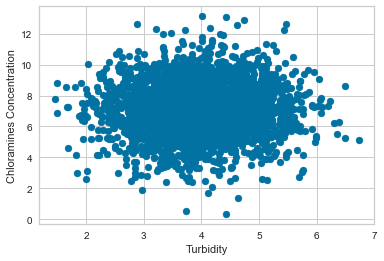

In [10]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Chloramines"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Chloramines Concentration")
    plt.show()

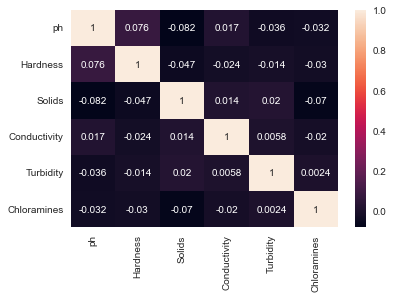

In [11]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
from pycaret.regression import *
regression = setup(df, target='Chloramines')
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,5319
1,Target,Chloramines
2,Target type,Regression
3,Original data shape,"(3276, 6)"
4,Transformed data shape,"(3276, 6)"
5,Transformed train set shape,"(2293, 6)"
6,Transformed test set shape,"(983, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,1.2185,2.4237,1.5538,0.0009,0.2081,0.2065,0.3260
br,Bayesian Ridge,1.2184,2.4240,1.5539,0.0008,0.2081,0.2066,0.3160
lasso,Lasso Regression,1.2185,2.4246,1.5541,0.0006,0.2081,0.2066,0.3410
lr,Linear Regression,1.2192,2.4253,1.5544,0.0000,0.2081,0.2067,0.7790
ridge,Ridge Regression,1.2192,2.4253,1.5544,0.0000,0.2081,0.2067,0.3200
lar,Least Angle Regression,1.2192,2.4253,1.5544,0.0000,0.2081,0.2067,0.3140
dummy,Dummy Regressor,1.2178,2.4315,1.5563,-0.0022,0.2084,0.2066,0.3490
llar,Lasso Least Angle Regression,1.2178,2.4315,1.5563,-0.0022,0.2084,0.2066,0.3190
omp,Orthogonal Matching Pursuit,1.2225,2.4458,1.5609,-0.0081,0.2089,0.2074,0.3180
ada,AdaBoost Regressor,1.2250,2.4646,1.5670,-0.0163,0.2094,0.2072,0.3770


                                    Model     MAE      MSE    RMSE       R2  \
en                            Elastic Net  1.2185   2.4237  1.5538   0.0009   
br                         Bayesian Ridge  1.2184   2.4240  1.5539   0.0008   
lasso                    Lasso Regression  1.2185   2.4246  1.5541   0.0006   
lr                      Linear Regression  1.2192   2.4253  1.5544   0.0000   
ridge                    Ridge Regression  1.2192   2.4253  1.5544   0.0000   
lar                Least Angle Regression  1.2192   2.4253  1.5544   0.0000   
dummy                     Dummy Regressor  1.2178   2.4315  1.5563  -0.0022   
llar         Lasso Least Angle Regression  1.2178   2.4315  1.5563  -0.0022   
omp           Orthogonal Matching Pursuit  1.2225   2.4458  1.5609  -0.0081   
ada                    AdaBoost Regressor  1.2250   2.4646  1.5670  -0.0163   
gbr           Gradient Boosting Regressor  1.2354   2.5130  1.5822  -0.0364   
rf                Random Forest Regressor  1.2604   

In [18]:
pred = pd.read_csv('predict.csv')

In [19]:
best_model

ElasticNet(random_state=5319)

In [20]:
predict_model(best_model, data = pred)

,ph,Hardness,Solids,Conductivity,Turbidity,prediction_label
0,7,204.899994,20791.310547,564.309998,2.963,7.02247


In [21]:
final_best = finalize_model(best_model)
save_model(final_best, 'Chloramines_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Lenovo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ph', 'Hardness', 'Solids',
                                              'Conductivity', 'Turbidity'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', ElasticNet(random_state=5319))]),
 'Chloramines_pipeline.pkl')